<h1>All Imported Dictionary</h1>

In [51]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler



In [52]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [54]:
import xgboost
print(xgboost.__version__)


3.0.2


<h1>Imported Data</h1>

In [55]:
data = pd.read_csv('data_hotel_booking_demand.csv')
data.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [56]:
data.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


<h1>Data Cleaning</h1>

<h2>Manual</h2>

In [58]:
print(data.isnull().sum())
#jumlah missing values ada pada country saja. sebanyak 351 nilai. Coba kita menggunakan pendekatan manual, yang kosong dihapus.

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64


In [59]:
# Shows all rows with any missing value
missing_rows = data[data.isnull().any(axis=1)]

# Display the indexes of those rows
print(missing_rows.index)

# Optional: show full rows with missing values
print(missing_rows)


Index([  814,  1166,  1304,  1661,  2182,  2530,  2543,  2815,  2827,  3168,
       ...
       81038, 81817, 81904, 82190, 82271, 82466, 83084, 83106, 83353, 83426],
      dtype='int64', length=351)
      country market_segment  previous_cancellations  booking_changes  \
814       NaN  Offline TA/TO                       0                0   
1166      NaN         Direct                       2                0   
1304      NaN         Direct                       0                1   
1661      NaN      Corporate                       0                0   
2182      NaN      Corporate                       0                0   
...       ...            ...                     ...              ...   
82466     NaN  Offline TA/TO                       0                0   
83084     NaN      Corporate                       0                0   
83106     NaN         Direct                       0                0   
83353     NaN         Direct                       0                0  

In [60]:
#drop baris dengan missing value
data_drop = data.dropna()

# Confirm all missing values are removed
print(data_drop.isnull().sum())
print(f"Original shape: {data.shape}, After dropping: {data_drop.shape}")


country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64
Original shape: (83573, 11), After dropping: (83222, 11)


In [61]:
# Check for duplicate rows (all columns)
duplicates = data_drop[data_drop.duplicated()]

# Display duplicate rows
print(duplicates)

# Count number of duplicated rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")


      country market_segment  previous_cancellations  booking_changes  \
7         PRT         Groups                       0                0   
22        PRT         Groups                       0                0   
29        PRT      Online TA                       0                0   
34        PRT         Groups                       0                0   
44        PRT         Groups                       0                0   
...       ...            ...                     ...              ...   
83568     PRT      Online TA                       0                0   
83569     FRA      Online TA                       0                0   
83570     PRT      Online TA                       0                1   
83571      CN  Offline TA/TO                       0                0   
83572     PRT         Groups                       0                0   

      deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
7       Non Refund                     0   

<h1>Cek Data Unique </h1>

In [62]:
# Cek jumlah nilai unik dari beberapa kolom
columns_to_check = [
    'country',
    'market_segment',
    'deposit_type',
    'customer_type',
    'reserved_room_type'
]

# Tampilkan jumlah nilai unik
data_drop[columns_to_check].nunique()


country               162
market_segment          8
deposit_type            3
customer_type           4
reserved_room_type     10
dtype: int64

<h1>Cek Outlier</h1>

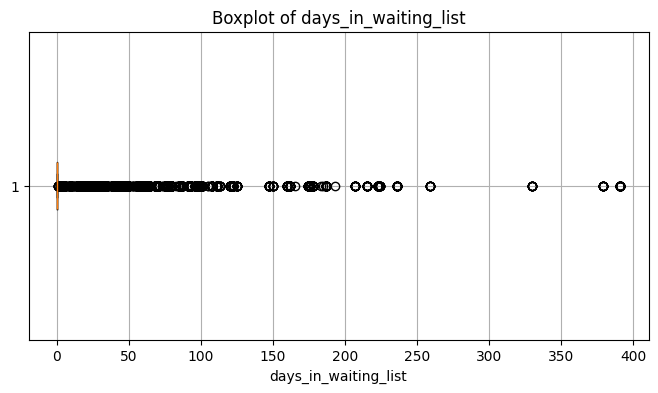

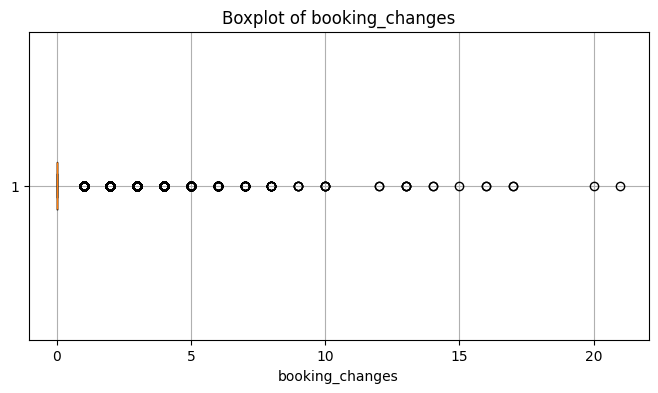

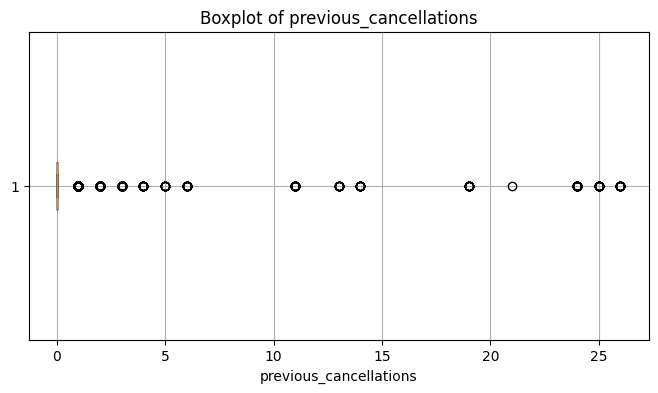

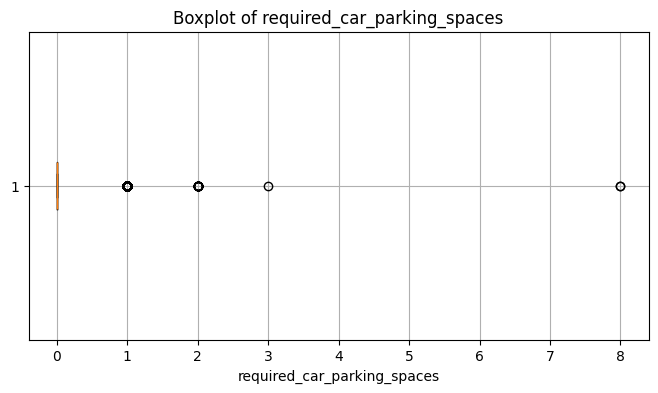

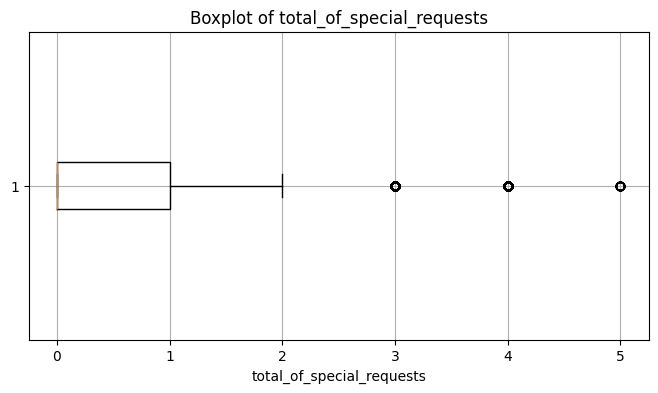

,Total,Outlier Count,Outlier %
days_in_waiting_list,83222.0,2585.0,3.11
booking_changes,83222.0,12646.0,15.20
previous_cancellations,83222.0,4490.0,5.40
required_car_parking_spaces,83222.0,5151.0,6.19
total_of_special_requests,83222.0,2041.0,2.45


In [63]:
# Daftar kolom numerik yang akan dicek outlier-nya
features_to_check = [
    'days_in_waiting_list',
    'booking_changes',
    'previous_cancellations',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

# Dictionary untuk menyimpan ringkasan
outlier_summary = {}

# Looping setiap kolom
for col in features_to_check:
    # Hitung Q1, Q3 dan IQR
    Q1 = data_drop[col].quantile(0.25)
    Q3 = data_drop[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Temukan baris yang merupakan outlier
    outliers = data_drop[(data_drop[col] < lower_bound) | (data_drop[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Simpan hasil ke dictionary
    outlier_summary[col] = {
        'Total': data_drop.shape[0],
        'Outlier Count': outlier_count,
        'Outlier %': round(outlier_count / data_drop.shape[0] * 100, 2)
    }

    # Tampilkan boxplot
    plt.figure(figsize=(8, 4))
    plt.boxplot(data_drop[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# Tampilkan ringkasan hasil deteksi outlier
outlier_summary_df = pd.DataFrame(outlier_summary).T
display(outlier_summary_df)


<h1>Binning</h1>

Setelah cek outlier dan juga data unique pada masing-masing variable, diputuskan untuk melakukan binning pada 2 variabel. Yang pertama adalah variabel country, yang kedua adalah variable booking changes.
Alasan :
1. Variable country (data kategori) memiliki data unik cukup banyak, kurang lebih 160 data unik. Sehingga apabila dilakukan encoding, nantinya akan memunculkan banyak feature baru yang berpotensi menimbulkan overfitting pada pemodelan. Bining coba dilakukan dengan melakukan klasifikasi negara berdasarkan :

**Europe**: All European continent countries, including non-EU.
**Asia**: Includes South Asia, East Asia, Southeast Asia, Central Asia.
**Africa**: Includes Northern, Sub-Saharan, and Eastern Africa.
**North America**: USA, Canada, Mexico, Central American countries.
**South America**: All continental South American countries.
**Middle East**: Countries in MENA region not already in Asia/Africa.
**Oceania**: Australia, New Zealand, Pacific Island nations.
**Other**: Minor territories, rare codes, or undefined zones.

2. Variabel booking changes. Setelah melakukan cek outliers, variabel booking changes memiliki outlier diatas 10% yang dapat diasumsikan akan mengganggu proses belajar machine learning. Berdasarkan referensi, binning dapat digunakan untuk memberi perlakuan pada data outlier.

https://medium.com/%40noorfatimaafzalbutt/algorithms-sensitive-to-outliers-and-how-to-handle-them-ff989296b9e5

In [64]:
data = data_drop.copy()

In [65]:
# Define country to region mapping
region_map = {
    # Europe
    'PRT': 'Europe', 'ESP': 'Europe', 'FRA': 'Europe', 'GBR': 'Europe', 'DEU': 'Europe',
    'ITA': 'Europe', 'NLD': 'Europe', 'BEL': 'Europe', 'CHE': 'Europe', 'AUT': 'Europe',
    'SWE': 'Europe', 'NOR': 'Europe', 'DNK': 'Europe', 'FIN': 'Europe', 'IRL': 'Europe',
    'POL': 'Europe', 'CZE': 'Europe', 'SVK': 'Europe', 'HUN': 'Europe', 'ROU': 'Europe',
    'BGR': 'Europe', 'GRC': 'Europe', 'HRV': 'Europe', 'SVN': 'Europe', 'EST': 'Europe',
    'LVA': 'Europe', 'LTU': 'Europe', 'ISL': 'Europe', 'LUX': 'Europe', 'AND': 'Europe',
    'MNE': 'Europe', 'ALB': 'Europe', 'MKD': 'Europe', 'BIH': 'Europe', 'BLR': 'Europe',
    'RUS': 'Europe', 'GGY': 'Europe', 'IMN': 'Europe', 'JEY': 'Europe', 'FRO': 'Europe',
    'LIE': 'Europe',

    # Asia
    'CHN': 'Asia', 'JPN': 'Asia', 'KOR': 'Asia', 'IND': 'Asia', 'IDN': 'Asia',
    'SGP': 'Asia', 'THA': 'Asia', 'VNM': 'Asia', 'PHL': 'Asia', 'MYS': 'Asia',
    'PAK': 'Asia', 'BGD': 'Asia', 'LKA': 'Asia', 'TWN': 'Asia', 'MAC': 'Asia',
    'KAZ': 'Asia', 'UZB': 'Asia', 'TJK': 'Asia', 'LAO': 'Asia', 'KHM': 'Asia',
    'MMR': 'Asia', 'IRN': 'Asia', 'IRQ': 'Asia', 'SYR': 'Asia', 'TMP': 'Asia',

    # Africa
    'EGY': 'Africa', 'ZAF': 'Africa', 'MAR': 'Africa', 'DZA': 'Africa', 'TUN': 'Africa',
    'NGA': 'Africa', 'KEN': 'Africa', 'ETH': 'Africa', 'GHA': 'Africa', 'UGA': 'Africa',
    'TZA': 'Africa', 'SEN': 'Africa', 'MOZ': 'Africa', 'CMR': 'Africa', 'ZMB': 'Africa',
    'ZWE': 'Africa', 'MLI': 'Africa', 'BEN': 'Africa', 'SDN': 'Africa', 'RWA': 'Africa',
    'SLE': 'Africa', 'BDI': 'Africa', 'CAF': 'Africa', 'GAB': 'Africa', 'CIV': 'Africa',
    'TGO': 'Africa', 'COM': 'Africa', 'GNB': 'Africa', 'SYC': 'Africa', 'MYT': 'Africa',

    # North America
    'USA': 'North America', 'CAN': 'North America', 'MEX': 'North America',
    'PRI': 'North America', 'CUB': 'North America', 'DOM': 'North America',
    'PAN': 'North America', 'GTM': 'North America', 'SLV': 'North America',
    'NIC': 'North America', 'HND': 'North America',

    # South America
    'BRA': 'South America', 'ARG': 'South America', 'CHL': 'South America',
    'COL': 'South America', 'PER': 'South America', 'URY': 'South America',
    'PRY': 'South America', 'BOL': 'South America', 'ECU': 'South America',
    'VEN': 'South America', 'GUY': 'South America', 'SUR': 'South America',

    # Oceania
    'AUS': 'Oceania', 'NZL': 'Oceania', 'KIR': 'Oceania', 'NCL': 'Oceania',
    'PLW': 'Oceania',

    # Middle East
    'ARE': 'Middle East', 'SAU': 'Middle East', 'QAT': 'Middle East', 'KWT': 'Middle East',
    'BHR': 'Middle East', 'JOR': 'Middle East', 'ISR': 'Middle East', 'LBN': 'Middle East',
    'OMN': 'Middle East',

    # Other or undefined
    'ATA': 'Other', 'AIA': 'Other', 'ARM': 'Other', 'ABW': 'Other', 'CYM': 'Other',
    'GLP': 'Other', 'DMA': 'Other', 'LCA': 'Other', 'VGB': 'Other', 'UMI': 'Other'
}

# Apply the mapping
data['country_region'] = data['country'].map(region_map).fillna('Other')

# Check result (optional)
print(data['country_region'].value_counts())


country_region
Europe           75354
South America     1891
Other             1594
North America     1567
Asia              1351
Middle East        618
Africa             494
Oceania            353
Name: count, dtype: int64


In [66]:
# Fungsi untuk kategorisasi
def categorize_booking_changes(x):
    if x == 0:
        return 'tidak pernah'
    elif 1 <= x <= 3:
        return 'pernah 1-3 kali'
    else:
        return 'pernah lebih dari 3 kali'

# Terapkan ke kolom baru
data['booking_changes_category'] = data['booking_changes'].apply(categorize_booking_changes)

# (Opsional) Lihat distribusinya
print(data['booking_changes_category'].value_counts())


booking_changes_category
tidak pernah                70576
pernah 1-3 kali             12201
pernah lebih dari 3 kali      445
Name: count, dtype: int64


<h1>Split Data to Train, Test, Val</h1>

In [67]:
y = data['is_canceled']
X = data.drop(columns=['country', 'booking_changes','is_canceled'])


# Cek bentuknya
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (83222, 10)
y shape: (83222,)


In [68]:
from sklearn.model_selection import train_test_split

# X = data fitur, y = target is_canceled (0 atau 1)

# 1. Split awal: Train (60%) vs Temp (Val+Test 40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.4, 
    stratify=y, 
    random_state=1616
)

# 2. Split Temp: Validation (20%) dan Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    stratify=y_temp, 
    random_state=1616
)

# Cek ukuran data
print(f"Train size     : {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size      : {X_test.shape[0]}")


Train size     : 49933
Validation size: 16644
Test size      : 16645


<h1>Encode</h1>

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83222 entries, 0 to 83572
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   market_segment               83222 non-null  object
 1   previous_cancellations       83222 non-null  int64 
 2   deposit_type                 83222 non-null  object
 3   days_in_waiting_list         83222 non-null  int64 
 4   customer_type                83222 non-null  object
 5   reserved_room_type           83222 non-null  object
 6   required_car_parking_spaces  83222 non-null  int64 
 7   total_of_special_requests    83222 non-null  int64 
 8   country_region               83222 non-null  object
 9   booking_changes_category     83222 non-null  object
dtypes: int64(4), object(6)
memory usage: 7.0+ MB


In [70]:
y.info()

<class 'pandas.core.series.Series'>
Index: 83222 entries, 0 to 83572
Series name: is_canceled
Non-Null Count  Dtype
--------------  -----
83222 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


Sebelum masuk ke pemodelan, data non numerik diubah terlebih dahulu menjadi data numerik.
1. country : drop
2. market segment : OHE
3. booking_changes : drop
4. deposit_type : OHE
5. customer_type : OHE
6. reserved_room : OHE
7. country_region : OHE
8. booking_changes_category : Ordinal

<h2>Pipeline Transformer</h2>

In [71]:

# Kolom encoding
ordinal_col = ['booking_changes_category']
ordinal_values = [['tidak pernah', 'pernah 1-3 kali', 'pernah lebih dari 3 kali']]

onehot_cols = [
    'market_segment',
    'deposit_type',
    'customer_type',
    'reserved_room_type',
    'country_region'
]

# Semua kolom numerik lain (kecuali kategorikal)
numeric_cols = [col for col in X_train.columns if col not in ordinal_col + onehot_cols]


# Define ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(categories=ordinal_values), ordinal_col),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False), onehot_cols),
    ('num', StandardScaler(), numeric_cols)
])

# Buat pipeline
preprocess_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [72]:
X_train_processed = preprocess_pipeline.fit_transform(X_train)
print(X_train_processed.shape)
X_val_processed = preprocess_pipeline.transform(X_val)
print(X_val_processed.shape)



(49933, 33)
(16644, 33)


<h2>Cek hasil Encoding</h2>

In [73]:
# Nama kolom dari OrdinalEncoder
ordinal_feature_names = ordinal_col

# Nama kolom dari OneHotEncoder
ohe_feature_names = list(
    preprocess_pipeline.named_steps['preprocessor']
    .named_transformers_['onehot']
    .get_feature_names_out(onehot_cols)
)

# Nama kolom dari StandardScaler
numeric_feature_names = numeric_cols

# Gabungkan semua nama kolom akhir
final_columns = ordinal_feature_names + ohe_feature_names + numeric_feature_names

# 3. Transformasi data
X_train_transformed = preprocess_pipeline.transform(X_train)

# 4. Konversi ke DataFrame
import pandas as pd

X_train_data = pd.DataFrame(X_train_transformed, columns=final_columns)
X_train_data.head()


,booking_changes_category,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_Non Refund,deposit_type_Refundable,...,country_region_Europe,country_region_Middle East,country_region_North America,country_region_Oceania,country_region_Other,country_region_South America,previous_cancellations,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.104742,-0.131703,-0.253734,3.047456
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.104742,-0.131703,-0.253734,-0.719747
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.104742,-0.131703,-0.253734,0.535987
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.104742,-0.131703,-0.253734,1.791722
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.104742,-0.131703,-0.253734,-0.719747


<h1>Balancing Data</h1>

Distribusi Persentase Label pada Data Train:
is_canceled
0    63.072517
1    36.927483
Name: proportion, dtype: float64


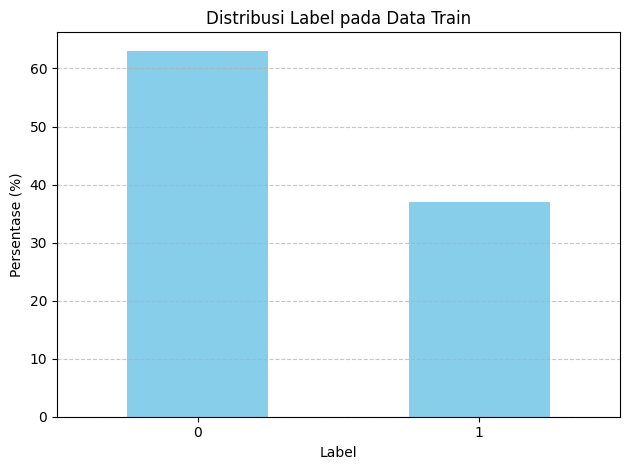

In [74]:
import pandas as pd

# Cek distribusi target pada data training
train_distribution = y_train.value_counts(normalize=True) * 100
print("Distribusi Persentase Label pada Data Train:")
print(train_distribution)

# Visualisasi bar plot
import matplotlib.pyplot as plt

train_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribusi Label pada Data Train')
plt.xlabel('Label')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [75]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE instance
smote = SMOTE(random_state=1616)

# Lakukan oversampling hanya pada data train (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Cek distribusi baru
print("Distribusi label sebelum balancing:", Counter(y_train))
print("Distribusi label sesudah balancing:", Counter(y_train_balanced))

X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=feature_names)


Distribusi label sebelum balancing: Counter({0: 31494, 1: 18439})
Distribusi label sesudah balancing: Counter({0: 31494, 1: 31494})


<h1>Modeling</h1>

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Inisialisasi model-model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
}

# Simpan hasil evaluasi
results = []

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_val_processed)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4)
    })

# Tampilkan hasil
results_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False)
print("\n=== Model Comparison ===")
display(results_df)


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:24:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Model Comparison ===


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7424,0.6311,0.7276,0.6759
1,Random Forest,0.7921,0.7507,0.6541,0.6991
7,XGBoost,0.7895,0.7453,0.6533,0.6963
2,Decision Tree,0.7921,0.7527,0.6507,0.6980
3,SVM,0.7912,0.7610,0.6333,0.6913
5,AdaBoost,0.7864,0.7555,0.6233,0.6831
6,Gradient Boosting,0.7931,0.7747,0.6199,0.6887
4,KNN,0.7758,0.8683,0.4632,0.6041


Dari hasil pengujian model, dapat dilihat bahwa Random Forest memiliki Akurasi dan Recall tertinggi dibandingkan model lainnya. Untuk itu selanjutnya Hypertuning dilakukan untuk model Random Forest. 


<h1>Hypertuning</h1>

<h2>Random Forest</h2>

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=144; total time=   5.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=144; total time=   5.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=144; total time=   5.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=144; total time=   5.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=144; total time=   5.3s
[CV] END bootstrap=False, class_weight

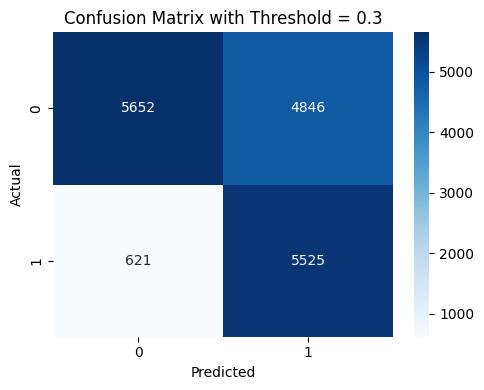

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model awal
rf = RandomForestClassifier(class_weight='balanced',random_state=1616)

# Parameter tambahan untuk tuning
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='recall',  # Fokus pada recall
    verbose=2,
    n_jobs=-1,
    random_state=1616
)

# Fit model
random_search.fit(X_train_balanced, y_train_balanced)

# Hasil terbaik
print("Best Parameters:", random_search.best_params_)
print("Best Recall (CV):", random_search.best_score_)

# === Evaluasi di Data Validasi ===
best_rf = random_search.best_estimator_

# Default threshold (0.5)
y_pred_val_default = best_rf.predict(X_val_processed)
print("\n=== Default Threshold (0.5) ===")
print("Accuracy :", accuracy_score(y_val, y_pred_val_default))
print("Precision:", precision_score(y_val, y_pred_val_default))
print("Recall   :", recall_score(y_val, y_pred_val_default))
print("F1 Score :", f1_score(y_val, y_pred_val_default))

# === Custom Threshold (e.g., 0.3) ===
y_proba_val = best_rf.predict_proba(X_val_processed)[:, 1]
y_pred_val_custom = (y_proba_val >= 0.3).astype(int)

print("\n=== Custom Threshold (0.3) ===")
print("Accuracy :", accuracy_score(y_val, y_pred_val_custom))
print("Precision:", precision_score(y_val, y_pred_val_custom))
print("Recall   :", recall_score(y_val, y_pred_val_custom))
print("F1 Score :", f1_score(y_val, y_pred_val_custom))

# === Confusion Matrix (optional) ===
cm = confusion_matrix(y_val, y_pred_val_custom)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix with Threshold = 0.3")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [129]:
best_rf

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_features='log2', n_estimators=230,
                       random_state=1616)

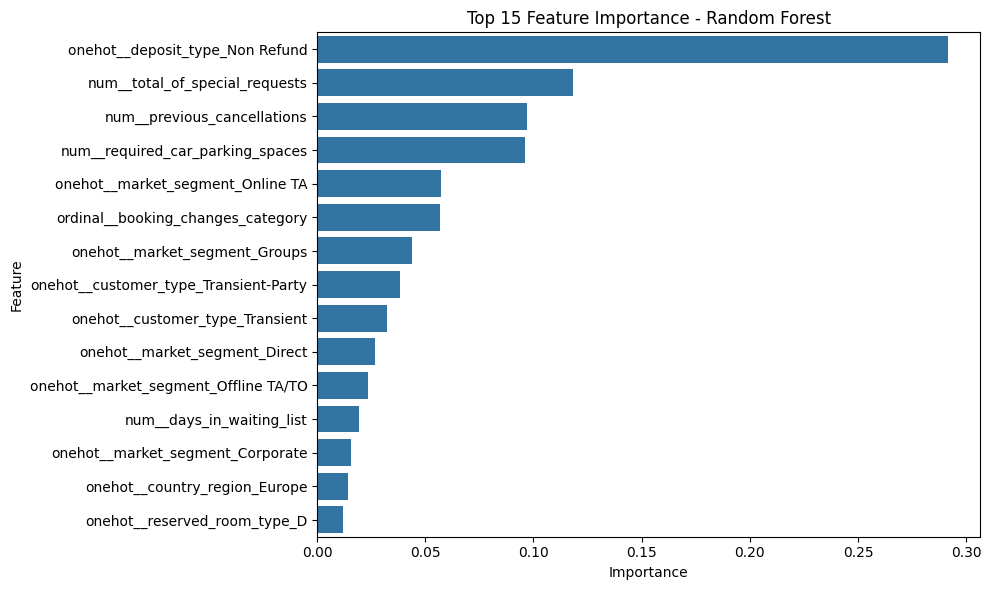

In [125]:

# 1. Ambil feature importance dari model
importances = best_rf.feature_importances_

# 2. Ambil nama fitur dari pipeline preprocessing
feature_names = preprocess_pipeline.named_steps['preprocessor'].get_feature_names_out()

# 3. Gabungkan jadi DataFrame
feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 4. Tampilkan top 15 fitur terpenting
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


<h2>XGBoost</h2>

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Parameter distribusi untuk tuning
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [3, 5, 10, None],
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 5],
}

# Inisialisasi model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1616)

# Randomized Search
random_search_2 = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',
    cv=5,
    verbose=2,
    random_state=1616,
    n_jobs=-1
)

# Fit ke data train
random_search_2.fit(X_train_balanced, y_train_balanced)

# Model terbaik
best_model = random_search_2.best_estimator_
print("Best Params:", random_search_2.best_params_)

# === Evaluasi default threshold (0.5)
y_pred_default = best_model.predict(X_val_processed)

print("\n=== Default Threshold (0.5) ===")
print("Accuracy :", accuracy_score(y_val, y_pred_default))
print("Precision:", precision_score(y_val, y_pred_default))
print("Recall   :", recall_score(y_val, y_pred_default))
print("F1 Score :", f1_score(y_val, y_pred_default))

# === Evaluasi custom threshold (0.3)
y_proba = best_model.predict_proba(X_val_processed)[:, 1]
y_pred_custom = (y_proba >= 0.3).astype(int)

print("\n=== Custom Threshold (0.3) ===")
print("Accuracy :", accuracy_score(y_val, y_pred_custom))
print("Precision:", precision_score(y_val, y_pred_custom))
print("Recall   :", recall_score(y_val, y_pred_custom))
print("F1 Score :", f1_score(y_val, y_pred_custom))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.6s
[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.6s
[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.6s
[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.6s
[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   0.8s
[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   0.8s
[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   0.8s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   0.8s
[CV] END colsample_bytree=0.906959681234591, gamma=5, learning_rate=0.05275026248071355, max_depth=5, min_child_weight=3, n_estimators=133, subsample=0.8279431350960774; total time=   0.8s
[CV] END colsample_bytree=0.906959681234591, gamma=5, learning_rate=0.05275026248071355, max_depth=5, min_child_weight=3, n_estimators=133, subsample=0.8279431350960774; total time=   0.9s
[CV] END colsample_bytree=0.906959681234591, gamma=5, learning_rate=0.05275026248071355, max_depth=5, min_child_weight=3, n_estimators=133, subsample=0.8279431350960774; total time=   0.8s
[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   1.0s
[CV] END colsample_bytree=0.906959681234591, gamma=5, lea

/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.906959681234591, gamma=5, learning_rate=0.05275026248071355, max_depth=5, min_child_weight=3, n_estimators=133, subsample=0.8279431350960774; total time=   0.8s
[CV] END colsample_bytree=0.9474308874448811, gamma=0, learning_rate=0.2511887659999401, max_depth=5, min_child_weight=5, n_estimators=202, subsample=0.8379884352024878; total time=   1.2s
[CV] END colsample_bytree=0.6171582678945587, gamma=0, learning_rate=0.1305270209643234, max_depth=5, min_child_weight=5, n_estimators=101, subsample=0.7838225728339697; total time=   0.6s
[CV] END colsample_bytree=0.6171582678945587, gamma=0, learning_rate=0.1305270209643234, max_depth=5, min_child_weight=5, n_estimators=101, subsample=0.7838225728339697; total time=   0.6s
[CV] END colsample_bytree=0.6171582678945587, gamma=0, learning_rate=0.1305270209643234, max_depth=5, min_child_weight=5, n_estimators=101, subsample=0.7838225728339697; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.9474308874448811, gamma=0, learning_rate=0.2511887659999401, max_depth=5, min_child_weight=5, n_estimators=202, subsample=0.8379884352024878; total time=   0.9s
[CV] END colsample_bytree=0.9474308874448811, gamma=0, learning_rate=0.2511887659999401, max_depth=5, min_child_weight=5, n_estimators=202, subsample=0.8379884352024878; total time=   1.0s
[CV] END colsample_bytree=0.9474308874448811, gamma=0, learning_rate=0.2511887659999401, max_depth=5, min_child_weight=5, n_estimators=202, subsample=0.8379884352024878; total time=   1.1s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.6171582678945587, gamma=0, learning_rate=0.1305270209643234, max_depth=5, min_child_weight=5, n_estimators=101, subsample=0.7838225728339697; total time=   0.6s
[CV] END colsample_bytree=0.9474308874448811, gamma=0, learning_rate=0.2511887659999401, max_depth=5, min_child_weight=5, n_estimators=202, subsample=0.8379884352024878; total time=   1.2s
[CV] END colsample_bytree=0.6171582678945587, gamma=0, learning_rate=0.1305270209643234, max_depth=5, min_child_weight=5, n_estimators=101, subsample=0.7838225728339697; total time=   0.5s
[CV] END colsample_bytree=0.5774344065030359, gamma=1, learning_rate=0.25968800792785385, max_depth=5, min_child_weight=5, n_estimators=193, subsample=0.8200965309394497; total time=   0.9s
[CV] END colsample_bytree=0.5774344065030359, gamma=1, learning_rate=0.25968800792785385, max_depth=5, min_child_weight=5, n_estimators=193, subsample=0.8200965309394497; total time=   0.7s
[CV] END colsample_bytree=0.5774344065030359, gamma=1

/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.5774344065030359, gamma=1, learning_rate=0.25968800792785385, max_depth=5, min_child_weight=5, n_estimators=193, subsample=0.8200965309394497; total time=   0.9s
[CV] END colsample_bytree=0.5774344065030359, gamma=1, learning_rate=0.25968800792785385, max_depth=5, min_child_weight=5, n_estimators=193, subsample=0.8200965309394497; total time=   0.9s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.9940228293319842, gamma=5, learning_rate=0.23633684660275656, max_depth=5, min_child_weight=5, n_estimators=154, subsample=0.8112229960104527; total time=   0.6s
[CV] END colsample_bytree=0.9940228293319842, gamma=5, learning_rate=0.23633684660275656, max_depth=5, min_child_weight=5, n_estimators=154, subsample=0.8112229960104527; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   1.0s
[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   1.0s
[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   1.0s
[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   0.9s
[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   1.1s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   1.0s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   1.0s
[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   1.0s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7894671177902753, gamma=5, learning_rate=0.26419612068800846, max_depth=10, min_child_weight=1, n_estimators=262, subsample=0.739788126112048; total time=   0.8s
[CV] END colsample_bytree=0.7894671177902753, gamma=5, learning_rate=0.26419612068800846, max_depth=10, min_child_weight=1, n_estimators=262, subsample=0.739788126112048; total time=   0.8s
[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   0.9s
[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   1.0s
[CV] END colsample_bytree=0.7894671177902753, gamma=5, learning_rate=0.26419612068800846, max_depth=10, min_child_weight=1, n_estimators=262, subsample=0.739788126112048; total time=   0.8s
[CV] END colsample_bytree=0.78946711779027

/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.7894671177902753, gamma=5, learning_rate=0.26419612068800846, max_depth=10, min_child_weight=1, n_estimators=262, subsample=0.739788126112048; total time=   0.8s
[CV] END colsample_bytree=0.5597469038345397, gamma=0, learning_rate=0.2917213800158865, max_depth=5, min_child_weight=3, n_estimators=110, subsample=0.7282326150471554; total time=   0.5s
[CV] END colsample_bytree=0.5597469038345397, gamma=0, learning_rate=0.2917213800158865, max_depth=5, min_child_weight=3, n_estimators=110, subsample=0.7282326150471554; total time=   0.5s
[CV] END colsample_bytree=0.5597469038345397, gamma=0, learning_rate=0.2917213800158865, max_depth=5, min_child_weight=3, n_estimators=110, subsample=0.7282326150471554; total time=   0.5s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.5597469038345397, gamma=0, learning_rate=0.2917213800158865, max_depth=5, min_child_weight=3, n_estimators=110, subsample=0.7282326150471554; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.6s
[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.6s
[CV] END colsample_bytree=0.8631064172753284, gamma=0, learning_rate=0.012701716603266468, max_depth=10, min_child_weight=1, n_estimators=133, subsample=0.9939080619020131; total time=   1.0s
[CV] END colsample_bytree=0.8631064172753284, gamma=0, learning_rate=0.012701716603266468, max_depth=10, min_child_weight=1, n_estimators=133, subsample=0.9939080619020131; total time=   1.1s
[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.6s
[CV] END colsample_bytree=0.8631064172753284, gam

/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.8631064172753284, gamma=0, learning_rate=0.012701716603266468, max_depth=10, min_child_weight=1, n_estimators=133, subsample=0.9939080619020131; total time=   1.1s
[CV] END colsample_bytree=0.8631064172753284, gamma=0, learning_rate=0.012701716603266468, max_depth=10, min_child_weight=1, n_estimators=133, subsample=0.9939080619020131; total time=   1.1s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.5s
[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.8s
[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.8s
[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.8s
[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.8s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.8s
[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.7s
[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.6s
[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.7s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.6s
[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9962675565970909, gamma=5, learning_rate=0.05940760624729107, max_depth=5, min_child_weight=5, n_estimators=142, subsample=0.5160545524247744; total time=   0.7s
[CV] END colsample_bytree=0.9962675565970909, gamma=5, learning_rate=0.05940760624729107, max_depth=5, min_child_weight=5, n_estimators=142, subsample=0.5160545524247744; total time=   0.7s
[CV] END colsample_bytree=0.9962675565970909, gamma=5, learning_rate=0.05940760624729107, max_depth=5, min_child_weight=5, n_estimators=142, subsample=0.5160545524247744; total time=   0.6s
[CV] END colsample_bytree=0.9962675565970909, gamma=5, learning_rate=0.05940760624729107, max_depth=5, min_child_weight=5, n_estimators=142, subsample=0.5160545524247744; total time=   0.7s
[CV] END colsample_bytree=0.9962675565970909, gamma=5, learning_rate=0.05940760624729107, max_depth=5, min_child_weight=5, n_estimators=142, subsample=0.5160545524247744; total time=   0.7s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   1.0s
[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   1.0s
[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   0.9s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.8s
[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.8s
[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.9s
[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   1.0s
[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   1.1s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.6495495854067106, gamma=1, learning_rate=0.1710637563591719, max_depth=10, min_child_weight=3, n_estimators=124, subsample=0.7948651214258127; total time=   0.6s
[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.8s
[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.8s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.6495495854067106, gamma=1, learning_rate=0.1710637563591719, max_depth=10, min_child_weight=3, n_estimators=124, subsample=0.7948651214258127; total time=   0.6s
[CV] END colsample_bytree=0.6495495854067106, gamma=1, learning_rate=0.1710637563591719, max_depth=10, min_child_weight=3, n_estimators=124, subsample=0.7948651214258127; total time=   0.6s
[CV] END colsample_bytree=0.6495495854067106, gamma=1, learning_rate=0.1710637563591719, max_depth=10, min_child_weight=3, n_estimators=124, subsample=0.7948651214258127; total time=   0.6s
[CV] END colsample_bytree=0.6495495854067106, gamma=1, learning_rate=0.1710637563591719, max_depth=10, min_child_weight=3, n_estimators=124, subsample=0.7948651214258127; total time=   0.6s
[CV] END colsample_bytree=0.8100474162145077, gamma=5, learning_rate=0.16191115060301678, max_depth=3, min_child_weight=5, n_estimators=298, subsample=0.9967571166375963; total time=   0.8s
[CV] END colsample_bytree=0.8100474162145077, gamm

/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:59:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'colsample_bytree': np.float64(0.5597469038345397), 'gamma': 0, 'learning_rate': np.float64(0.2917213800158865), 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 110, 'subsample': np.float64(0.7282326150471554)}

=== Default Threshold (0.5) ===
Accuracy : 0.7894736842105263
Precision: 0.7459962756052142
Recall   : 0.6518060527172145
F1 Score : 0.6957276832233414

=== Custom Threshold (0.3) ===
Accuracy : 0.6685892814227349
Precision: 0.5301377726750861
Recall   : 0.9015619915392125
F1 Score : 0.6676708037112905


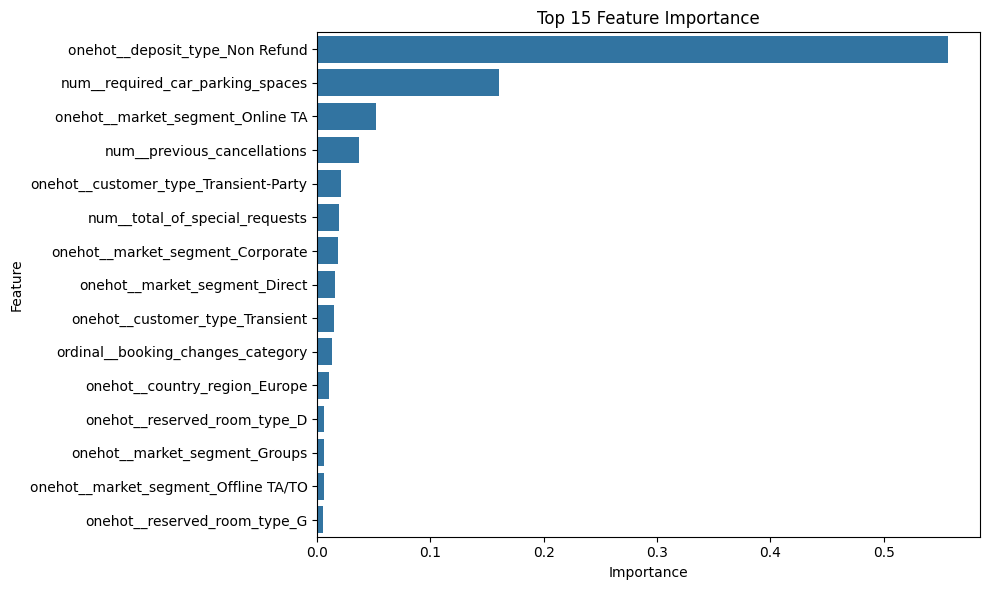

In [86]:
# Ambil model terbaik dari hasil RandomizedSearchCV
best_model = random_search_2.best_estimator_

# Ambil feature importances dari model XGBoost (pastikan ini XGBClassifier)
importances = best_model.feature_importances_

# Jika kamu menggunakan pipeline, ambil nama kolom dengan cara ini:
feature_names = preprocess_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Buat DataFrame untuk visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 15 fitur
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [87]:
# 1. Ambil model terbaik hasil tuning
best_model = random_search_2.best_estimator_

# 2. Ambil feature importance
importances = best_model.feature_importances_
feature_names = preprocess_pipeline.named_steps['preprocessor'].get_feature_names_out()

# 3. Buat DataFrame dan urutkan
import pandas as pd

feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=True)

# 4. Ambil 6 fitur dengan importance terkecil
least_important_features = feature_df.head(6)['feature'].tolist()
print("Fitur yang akan di-drop:", least_important_features)




Fitur yang akan di-drop: ['onehot__reserved_room_type_L', 'onehot__reserved_room_type_P', 'onehot__market_segment_Undefined', 'onehot__deposit_type_Refundable', 'onehot__country_region_Oceania', 'onehot__country_region_North America']


In [102]:
# 5. Drop fitur tersebut dari data yang sudah diproses
import numpy as np

# Konversi hasil preprocessing ke DataFrame
X_train_df = pd.DataFrame(X_train_balanced, columns=feature_names)
X_val_df = pd.DataFrame(X_val_processed, columns=feature_names)


# Hapus fitur
X_train_reduced = X_train_df.drop(columns=least_important_features)
X_val_reduced = X_val_df.drop(columns=least_important_features)



In [103]:
# Pastikan index y_train_balanced sama dengan X_train_balanced_df
y_train_balanced = pd.Series(y_train_balanced, index=X_train_balanced_df.index)


In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Parameter distribusi untuk dituning
param_dist_3 = {
    'n_estimators': randint(100, 300),
    'max_depth': [3, 5, 10, None],
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 5],
}

# Inisialisasi model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1616)

# Randomized Search
random_search_3 = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=1616,
    n_jobs=-1
)

# Fit model ke data train balanced
random_search_3.fit(X_train_reduced, y_train_balanced)

# Tampilkan parameter terbaik
print("Best Params:", random_search.best_params_)


# Prediksi menggunakan model yang sudah dilatih
y_pred = random_search_3.predict(X_val_reduced)  # atau random_search.best_estimator_.predict() jika kamu pakai tuning

# Hitung metrik evaluasi
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Tampilkan hasilnya
print(f"Akurasi     : {accuracy:.4f}")
print(f"F1 Score    : {f1:.4f}")
print(f"Recall      : {recall:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.6s
[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.6s
[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.6s
[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.6s
[CV] END colsample_bytree=0.6225067417680624, gamma=1, learning_rate=0.23685009255805411, max_depth=5, min_child_weight=1, n_estimators=144, subsample=0.8766859219080289; total time=   0.7s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   0.8s
[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   0.9s
[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   0.9s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.906959681234591, gamma=5, learning_rate=0.05275026248071355, max_depth=5, min_child_weight=3, n_estimators=133, subsample=0.8279431350960774; total time=   0.6s
[CV] END colsample_bytree=0.906959681234591, gamma=5, learning_rate=0.05275026248071355, max_depth=5, min_child_weight=3, n_estimators=133, subsample=0.8279431350960774; total time=   0.7s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   0.9s
[CV] END colsample_bytree=0.565460871667069, gamma=0, learning_rate=0.1553260623769782, max_depth=5, min_child_weight=3, n_estimators=169, subsample=0.7280323656776369; total time=   0.9s
[CV] END colsample_bytree=0.906959681234591, gamma=5, learning_rate=0.05275026248071355, max_depth=5, min_child_weight=3, n_estimators=133, subsample=0.8279431350960774; total time=   0.8s
[CV] END colsample_bytree=0.906959681234591, gamma=5, learning_rate=0.05275026248071355, max_depth=5, min_child_weight=3, n_estimators=133, subsample=0.8279431350960774; total time=   0.7s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.906959681234591, gamma=5, learning_rate=0.05275026248071355, max_depth=5, min_child_weight=3, n_estimators=133, subsample=0.8279431350960774; total time=   0.8s
[CV] END colsample_bytree=0.6171582678945587, gamma=0, learning_rate=0.1305270209643234, max_depth=5, min_child_weight=5, n_estimators=101, subsample=0.7838225728339697; total time=   0.6s
[CV] END colsample_bytree=0.9474308874448811, gamma=0, learning_rate=0.2511887659999401, max_depth=5, min_child_weight=5, n_estimators=202, subsample=0.8379884352024878; total time=   1.1s
[CV] END colsample_bytree=0.9474308874448811, gamma=0, learning_rate=0.2511887659999401, max_depth=5, min_child_weight=5, n_estimators=202, subsample=0.8379884352024878; total time=   0.9s
[CV] END colsample_bytree=0.6171582678945587, gamma=0, learning_rate=0.1305270209643234, max_depth=5, min_child_weight=5, n_estimators=101, subsample=0.7838225728339697; total time=   0.5s
[CV] END colsample_bytree=0.9474308874448811, gamma=0, 

/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.9474308874448811, gamma=0, learning_rate=0.2511887659999401, max_depth=5, min_child_weight=5, n_estimators=202, subsample=0.8379884352024878; total time=   0.8s
[CV] END colsample_bytree=0.9474308874448811, gamma=0, learning_rate=0.2511887659999401, max_depth=5, min_child_weight=5, n_estimators=202, subsample=0.8379884352024878; total time=   0.9s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6171582678945587, gamma=0, learning_rate=0.1305270209643234, max_depth=5, min_child_weight=5, n_estimators=101, subsample=0.7838225728339697; total time=   0.5s
[CV] END colsample_bytree=0.6171582678945587, gamma=0, learning_rate=0.1305270209643234, max_depth=5, min_child_weight=5, n_estimators=101, subsample=0.7838225728339697; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.5774344065030359, gamma=1, learning_rate=0.25968800792785385, max_depth=5, min_child_weight=5, n_estimators=193, subsample=0.8200965309394497; total time=   0.7s
[CV] END colsample_bytree=0.5774344065030359, gamma=1, learning_rate=0.25968800792785385, max_depth=5, min_child_weight=5, n_estimators=193, subsample=0.8200965309394497; total time=   0.7s
[CV] END colsample_bytree=0.5774344065030359, gamma=1, learning_rate=0.25968800792785385, max_depth=5, min_child_weight=5, n_estimators=193, subsample=0.8200965309394497; total time=   0.7s
[CV] END colsample_bytree=0.5774344065030359, gamma=1, learning_rate=0.25968800792785385, max_depth=5, min_child_weight=5, n_estimators=193, subsample=0.8200965309394497; total time=   0.6s
[CV] END colsample_bytree=0.9940228293319842, gamma=5, learning_rate=0.23633684660275656, max_depth=5, min_child_weight=5, n_estimators=154, subsample=0.8112229960104527; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.5774344065030359, gamma=1, learning_rate=0.25968800792785385, max_depth=5, min_child_weight=5, n_estimators=193, subsample=0.8200965309394497; total time=   0.7s
[CV] END colsample_bytree=0.9940228293319842, gamma=5, learning_rate=0.23633684660275656, max_depth=5, min_child_weight=5, n_estimators=154, subsample=0.8112229960104527; total time=   0.5s
[CV] END colsample_bytree=0.9940228293319842, gamma=5, learning_rate=0.23633684660275656, max_depth=5, min_child_weight=5, n_estimators=154, subsample=0.8112229960104527; total time=   0.5s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9940228293319842, gamma=5, learning_rate=0.23633684660275656, max_depth=5, min_child_weight=5, n_estimators=154, subsample=0.8112229960104527; total time=   0.5s
[CV] END colsample_bytree=0.9940228293319842, gamma=5, learning_rate=0.23633684660275656, max_depth=5, min_child_weight=5, n_estimators=154, subsample=0.8112229960104527; total time=   0.5s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   0.7s
[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   0.8s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   1.0s
[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   0.9s
[CV] END colsample_bytree=0.5881245228925185, gamma=1, learning_rate=0.25888327240687387, max_depth=None, min_child_weight=1, n_estimators=232, subsample=0.6746445598370941; total time=   1.0s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   0.9s
[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   0.9s
[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   0.9s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   0.9s
[CV] END colsample_bytree=0.5272978081140824, gamma=1, learning_rate=0.027417363533392913, max_depth=None, min_child_weight=3, n_estimators=168, subsample=0.7314615956525727; total time=   0.8s
[CV] END colsample_bytree=0.7894671177902753, gamma=5, learning_rate=0.26419612068800846, max_depth=10, min_child_weight=1, n_estimators=262, subsample=0.739788126112048; total time=   0.7s
[CV] END colsample_bytree=0.7894671177902753, gamma=5, learning_rate=0.26419612068800846, max_depth=10, min_child_weight=1, n_estimators=262, subsample=0.739788126112048; total time=   0.7s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.5597469038345397, gamma=0, learning_rate=0.2917213800158865, max_depth=5, min_child_weight=3, n_estimators=110, subsample=0.7282326150471554; total time=   0.5s
[CV] END colsample_bytree=0.7894671177902753, gamma=5, learning_rate=0.26419612068800846, max_depth=10, min_child_weight=1, n_estimators=262, subsample=0.739788126112048; total time=   0.7s
[CV] END colsample_bytree=0.7894671177902753, gamma=5, learning_rate=0.26419612068800846, max_depth=10, min_child_weight=1, n_estimators=262, subsample=0.739788126112048; total time=   0.7s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.5597469038345397, gamma=0, learning_rate=0.2917213800158865, max_depth=5, min_child_weight=3, n_estimators=110, subsample=0.7282326150471554; total time=   0.5s
[CV] END colsample_bytree=0.5597469038345397, gamma=0, learning_rate=0.2917213800158865, max_depth=5, min_child_weight=3, n_estimators=110, subsample=0.7282326150471554; total time=   0.4s
[CV] END colsample_bytree=0.7894671177902753, gamma=5, learning_rate=0.26419612068800846, max_depth=10, min_child_weight=1, n_estimators=262, subsample=0.739788126112048; total time=   0.8s
[CV] END colsample_bytree=0.5597469038345397, gamma=0, learning_rate=0.2917213800158865, max_depth=5, min_child_weight=3, n_estimators=110, subsample=0.7282326150471554; total time=   0.5s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.5597469038345397, gamma=0, learning_rate=0.2917213800158865, max_depth=5, min_child_weight=3, n_estimators=110, subsample=0.7282326150471554; total time=   0.5s
[CV] END colsample_bytree=0.8631064172753284, gamma=0, learning_rate=0.012701716603266468, max_depth=10, min_child_weight=1, n_estimators=133, subsample=0.9939080619020131; total time=   0.8s
[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.5s
[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.6s
[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.5s
[CV] END colsample_bytree=0.8631064172753284, gamma=

/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.8631064172753284, gamma=0, learning_rate=0.012701716603266468, max_depth=10, min_child_weight=1, n_estimators=133, subsample=0.9939080619020131; total time=   1.0s
[CV] END colsample_bytree=0.8631064172753284, gamma=0, learning_rate=0.012701716603266468, max_depth=10, min_child_weight=1, n_estimators=133, subsample=0.9939080619020131; total time=   1.2s
[CV] END colsample_bytree=0.8631064172753284, gamma=0, learning_rate=0.012701716603266468, max_depth=10, min_child_weight=1, n_estimators=133, subsample=0.9939080619020131; total time=   1.0s
[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.5s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.7064192798921809, gamma=5, learning_rate=0.2759759824117005, max_depth=5, min_child_weight=3, n_estimators=183, subsample=0.8442279200403059; total time=   0.6s
[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.8s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.8s
[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.7s
[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.5s
[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.7s
[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.6s
[CV] END colsample_bytree=0.7898818237670091, gamma=1, learning_rate=0.1476008821934647, max_depth=3, min_child_weight=5, n_estimators=242, subsample=0.9108097313365484; total time=   0.8s
[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.7s
[CV] END colsample_bytree=0.8062624839828224, gamma=5, learning_rate=0.11275563574611142, max_depth=3, min_child_weight=5, n_estimators=167, subsample=0.6642419870793026; total time=   0.6s
[CV] END colsample_bytree=0.9962675565970909, gamma=

/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9962675565970909, gamma=5, learning_rate=0.05940760624729107, max_depth=5, min_child_weight=5, n_estimators=142, subsample=0.5160545524247744; total time=   0.6s
[CV] END colsample_bytree=0.9962675565970909, gamma=5, learning_rate=0.05940760624729107, max_depth=5, min_child_weight=5, n_estimators=142, subsample=0.5160545524247744; total time=   0.6s
[CV] END colsample_bytree=0.9962675565970909, gamma=5, learning_rate=0.05940760624729107, max_depth=5, min_child_weight=5, n_estimators=142, subsample=0.5160545524247744; total time=   0.6s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9962675565970909, gamma=5, learning_rate=0.05940760624729107, max_depth=5, min_child_weight=5, n_estimators=142, subsample=0.5160545524247744; total time=   0.8s
[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   0.9s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   0.8s
[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   0.8s
[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.6s
[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   0.8s
[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.7s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.5939736178607398, gamma=0, learning_rate=0.08496179003331614, max_depth=10, min_child_weight=5, n_estimators=140, subsample=0.8117751664378894; total time=   0.8s
[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.8s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.8s
[CV] END colsample_bytree=0.6495495854067106, gamma=1, learning_rate=0.1710637563591719, max_depth=10, min_child_weight=3, n_estimators=124, subsample=0.7948651214258127; total time=   0.6s
[CV] END colsample_bytree=0.6495495854067106, gamma=1, learning_rate=0.1710637563591719, max_depth=10, min_child_weight=3, n_estimators=124, subsample=0.7948651214258127; total time=   0.6s
[CV] END colsample_bytree=0.6495495854067106, gamma=1, learning_rate=0.1710637563591719, max_depth=10, min_child_weight=3, n_estimators=124, subsample=0.7948651214258127; total time=   0.6s
[CV] END colsample_bytree=0.6025464671485663, gamma=5, learning_rate=0.24944747383138177, max_depth=3, min_child_weight=3, n_estimators=265, subsample=0.6733986400941606; total time=   0.8s
[CV] END colsample_bytree=0.6495495854067106, gamm

/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.cond

[CV] END colsample_bytree=0.8100474162145077, gamma=5, learning_rate=0.16191115060301678, max_depth=3, min_child_weight=5, n_estimators=298, subsample=0.9967571166375963; total time=   0.6s
[CV] END colsample_bytree=0.8100474162145077, gamma=5, learning_rate=0.16191115060301678, max_depth=3, min_child_weight=5, n_estimators=298, subsample=0.9967571166375963; total time=   0.5s
[CV] END colsample_bytree=0.8100474162145077, gamma=5, learning_rate=0.16191115060301678, max_depth=3, min_child_weight=5, n_estimators=298, subsample=0.9967571166375963; total time=   0.5s
[CV] END colsample_bytree=0.8100474162145077, gamma=5, learning_rate=0.16191115060301678, max_depth=3, min_child_weight=5, n_estimators=298, subsample=0.9967571166375963; total time=   0.5s
[CV] END colsample_bytree=0.8100474162145077, gamma=5, learning_rate=0.16191115060301678, max_depth=3, min_child_weight=5, n_estimators=298, subsample=0.9967571166375963; total time=   0.5s


/Users/shofiyamuntazyrahmani/Documents/Nabila/DataScienceJourney/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:12:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 230}
Akurasi     : 0.7913
F1 Score    : 0.6948
Recall      : 0.6433


In [111]:
X_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ordinal__booking_changes_category      62988 non-null  float64
 1   onehot__market_segment_Complementary   62988 non-null  float64
 2   onehot__market_segment_Corporate       62988 non-null  float64
 3   onehot__market_segment_Direct          62988 non-null  float64
 4   onehot__market_segment_Groups          62988 non-null  float64
 5   onehot__market_segment_Offline TA/TO   62988 non-null  float64
 6   onehot__market_segment_Online TA       62988 non-null  float64
 7   onehot__deposit_type_Non Refund        62988 non-null  float64
 8   onehot__customer_type_Group            62988 non-null  float64
 9   onehot__customer_type_Transient        62988 non-null  float64
 10  onehot__customer_type_Transient-Party  62988 non-null  float64
 11  on

In [112]:
y_train_balanced.info()
y_train_balanced.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 62988 entries, 0 to 62987
Series name: is_canceled
Non-Null Count  Dtype
--------------  -----
62988 non-null  int64
dtypes: int64(1)
memory usage: 492.2 KB


count    62988.000000
mean         0.500000
std          0.500004
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

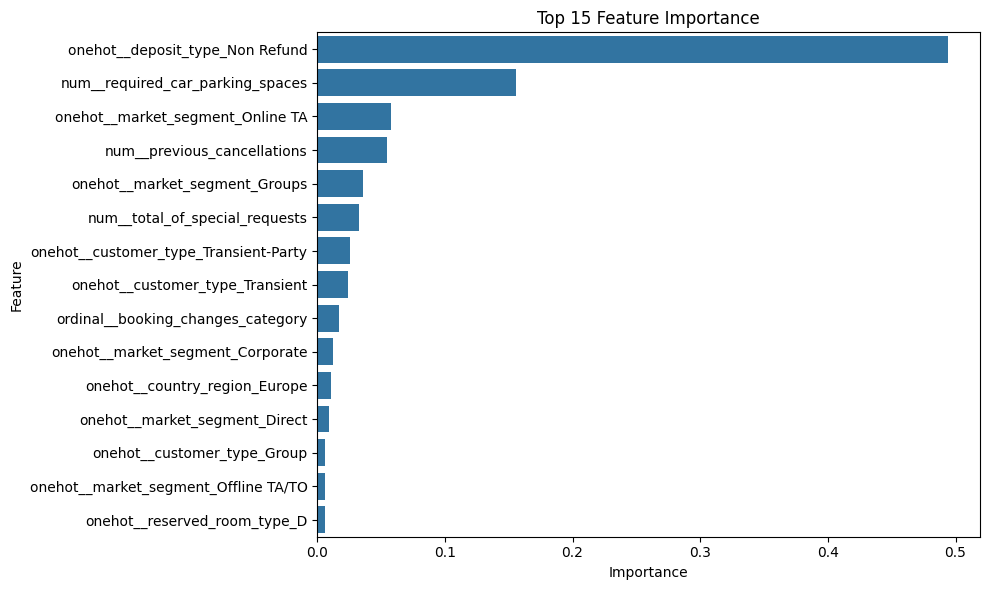

In [116]:
# Pastikan X_train_reduced sudah dalam bentuk DataFrame
reduced_feature_names = X_train_reduced.columns.tolist()

# Ambil feature importance dari best model
importances = best_model.feature_importances_

# Buat DataFrame untuk visualisasi
feature_df = pd.DataFrame({
    'feature': reduced_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 15 fitur
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


<h1>Simpan Model Terbaik</h1>

Setelah melakukan uji model menggunakan Random Forest dan XGBoost, diputuskan untuk menggunakan Random Forest. 
Dari aspek Recall, F1 score, Accuracy dan Precision lebih dapat diterima menggunakan model berikut :

In [132]:
best_rf

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_features='log2', n_estimators=230,
                       random_state=1616)

In [126]:
import joblib

# Simpan model terbaik ke file
joblib.dump(best_rf, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

<h1>Uji Model Menggunakan Test Set</h1>

In [ ]:
# Buat pipeline
preprocess_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [127]:
model = joblib.load('best_random_forest_model.pkl')

In [128]:
X_test_processed = preprocess_pipeline.transform(X_test)

y_proba_test = model.predict_proba(X_test_processed)[:, 1]
y_pred_test = (y_proba_test >= 0.3).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))




              precision    recall  f1-score   support

           0       0.90      0.54      0.67     10498
           1       0.53      0.89      0.67      6147

    accuracy                           0.67     16645
   macro avg       0.71      0.71      0.67     16645
weighted avg       0.76      0.67      0.67     16645



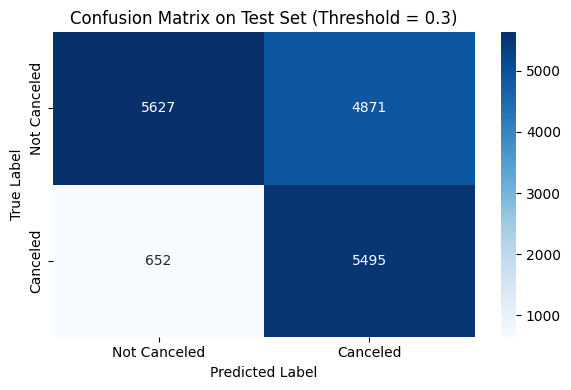

In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualisasikan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set (Threshold = 0.3)')
plt.tight_layout()
plt.show()


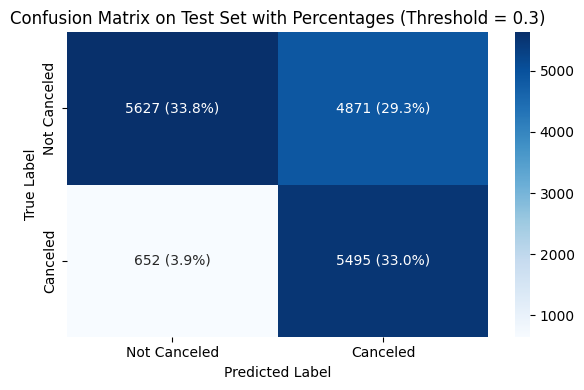

In [131]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cm_percent = cm / cm.sum() * 100  # hitung persentase dari total

# Buat label gabungan: jumlah & persentase
labels = np.array([
    [f"{cm[0,0]} ({cm_percent[0,0]:.1f}%)", f"{cm[0,1]} ({cm_percent[0,1]:.1f}%)"],
    [f"{cm[1,0]} ({cm_percent[1,0]:.1f}%)", f"{cm[1,1]} ({cm_percent[1,1]:.1f}%)"]
])

# Visualisasikan
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set with Percentages (Threshold = 0.3)')
plt.tight_layout()
plt.show()
